In [1]:
!pip install statsmodels

In [11]:
!pip install empiricaldist


  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for empiricaldist: filename=empiricaldist-0.8.0-py3-none-any.whl size=12556 sha256=0a45f3dc38973267741c9926bf5aec7dfc167cdca6ab6316a65f1d14e30d67d1
  Stored in directory: /Users/meganpokal/Library/Caches/pip/wheels/b3/2f/56/a930eaefbc44124b9e4253d6df24bc01ad2eb2bba9607fa3d7
Successfully built empiricaldist


In [12]:
from empiricaldist import Pmf, Cdf


In [36]:
# Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, ttest_ind
from statsmodels.formula.api import ols

In [3]:
import zipfile
import os

# Path to the zip file
zip_file_path = 'Fitbit.zip'
extracted_folder = 'path_to_extracted_files/'

# Extract the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_folder)

# List the files in the extracted folder to verify
extracted_files = os.listdir(extracted_folder)
print(extracted_files)

['mturkfitbit_export_4.12.16-5.12.16', 'mturkfitbit_export_3.12.16-4.11.16']


In [4]:
import pandas as pd
import os

# Extracted Folder
extracted_folder = 'path_to_extracted_files/'

# Load each of the CSV files
daily_activity = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv'))
heart_rate = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv'))
hourly_calories = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv'))
hourly_intensities = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv'))
hourly_steps = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv'))
minute_calories = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv'))
minute_intensities = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv'))
minute_mets = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv'))
minute_sleep = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteSleep_merged.csv'))
minute_steps = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteStepsNarrow_merged.csv'))
weight_log = pd.read_csv(os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/weightLogInfo_merged.csv'))

# Check the first few rows of each dataframe
print(daily_activity.head())
print(heart_rate.head())
print(hourly_calories.head())
print(hourly_intensities.head())
print(hourly_steps.head())
print(minute_calories.head())
print(minute_intensities.head())
print(minute_mets.head())
print(minute_sleep.head())
print(minute_steps.head())
print(weight_log.head())


           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    3/25/2016       11004           7.11             7.11   
1  1503960366    3/26/2016       17609          11.55            11.55   
2  1503960366    3/27/2016       12736           8.53             8.53   
3  1503960366    3/28/2016       13231           8.93             8.93   
4  1503960366    3/29/2016       12041           7.85             7.85   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                2.57                      0.46   
1                       0.0                6.92                      0.73   
2                       0.0                4.66                      0.16   
3                       0.0                3.19                      0.79   
4                       0.0                2.16                      1.09   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 4.07

In [5]:
import os

# Verify paths
files = [
    'dailyActivity_merged.csv',
    'heartrate_seconds_merged.csv',
    'hourlyCalories_merged.csv',
    'hourlyIntensities_merged.csv',
    'hourlySteps_merged.csv',
    'minuteCaloriesNarrow_merged.csv',
    'minuteIntensitiesNarrow_merged.csv',
    'minuteMETsNarrow_merged.csv',
    'minuteSleep_merged.csv',
    'minuteStepsNarrow_merged.csv',
    'weightLogInfo_merged.csv'
]

for file in files:
    file_path = os.path.join(extracted_folder, 'mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/', file)
    if not os.path.exists(file_path):
        print(f"File not found: {file_path}")
    else:
        print(f"Found: {file_path}")


Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/dailyActivity_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/heartrate_seconds_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyCalories_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlyIntensities_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/hourlySteps_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteCaloriesNarrow_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteIntensitiesNarrow_merged.csv
Found: path_to_extracted_files/mturkfitbit_export_3.12.16-4.11.16/Fitabase Data 3.12.16-4.11.16/minuteMETsNarrow_merged.csv
Found

In [6]:
# Check for missing values and data types
print(daily_activity.info())
print(daily_activity.describe())

# Display first few rows
print(daily_activity.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 457 entries, 0 to 456
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        457 non-null    int64  
 1   ActivityDate              457 non-null    object 
 2   TotalSteps                457 non-null    int64  
 3   TotalDistance             457 non-null    float64
 4   TrackerDistance           457 non-null    float64
 5   LoggedActivitiesDistance  457 non-null    float64
 6   VeryActiveDistance        457 non-null    float64
 7   ModeratelyActiveDistance  457 non-null    float64
 8   LightActiveDistance       457 non-null    float64
 9   SedentaryActiveDistance   457 non-null    float64
 10  VeryActiveMinutes         457 non-null    int64  
 11  FairlyActiveMinutes       457 non-null    int64  
 12  LightlyActiveMinutes      457 non-null    int64  
 13  SedentaryMinutes          457 non-null    int64  
 14  Calories  

In [8]:
print(daily_activity.columns)

Index(['Id', 'ActivityDate', 'TotalSteps', 'TotalDistance', 'TrackerDistance',
       'LoggedActivitiesDistance', 'VeryActiveDistance',
       'ModeratelyActiveDistance', 'LightActiveDistance',
       'SedentaryActiveDistance', 'VeryActiveMinutes', 'FairlyActiveMinutes',
       'LightlyActiveMinutes', 'SedentaryMinutes', 'Calories'],
      dtype='object')


In [9]:
# Convert 'ActivityDate' to a datetime object
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

# Verify the conversion
print(daily_activity['ActivityDate'].head())


0   2016-03-25
1   2016-03-26
2   2016-03-27
3   2016-03-28
4   2016-03-29
Name: ActivityDate, dtype: datetime64[ns]


In [17]:
import pandas as pd
import zipfile

# Path to the zip file
zip_path = '/Users/meganpokal/PycharmProjects/JupyterProject1/models/Fitbit.zip'

# Define the file name inside the zip
file_name = 'mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

# Extract the CSV file from the zip file
with zipfile.ZipFile(zip_path, 'r') as z:
    # Read the CSV file into a pandas DataFrame
    with z.open(file_name) as f:
        daily_activity = pd.read_csv(f)

# Check the first few rows of the daily activity data
print(daily_activity.head())



           Id ActivityDate  TotalSteps  TotalDistance  TrackerDistance  \
0  1503960366    4/12/2016       13162           8.50             8.50   
1  1503960366    4/13/2016       10735           6.97             6.97   
2  1503960366    4/14/2016       10460           6.74             6.74   
3  1503960366    4/15/2016        9762           6.28             6.28   
4  1503960366    4/16/2016       12669           8.16             8.16   

   LoggedActivitiesDistance  VeryActiveDistance  ModeratelyActiveDistance  \
0                       0.0                1.88                      0.55   
1                       0.0                1.57                      0.69   
2                       0.0                2.44                      0.40   
3                       0.0                2.14                      1.26   
4                       0.0                2.71                      0.41   

   LightActiveDistance  SedentaryActiveDistance  VeryActiveMinutes  \
0                 6.06

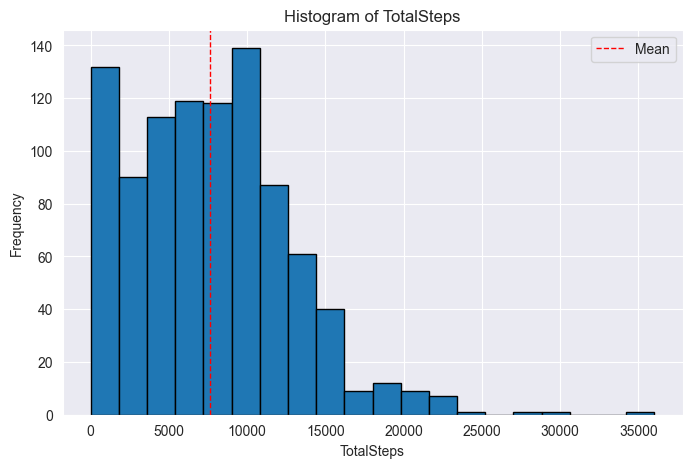

Descriptive Statistics for TotalSteps:
count      940.000000
mean      7637.910638
std       5087.150742
min          0.000000
25%       3789.750000
50%       7405.500000
75%      10727.000000
max      36019.000000
Name: TotalSteps, dtype: float64
Mode: [0]
Number of outliers in TotalSteps: 12



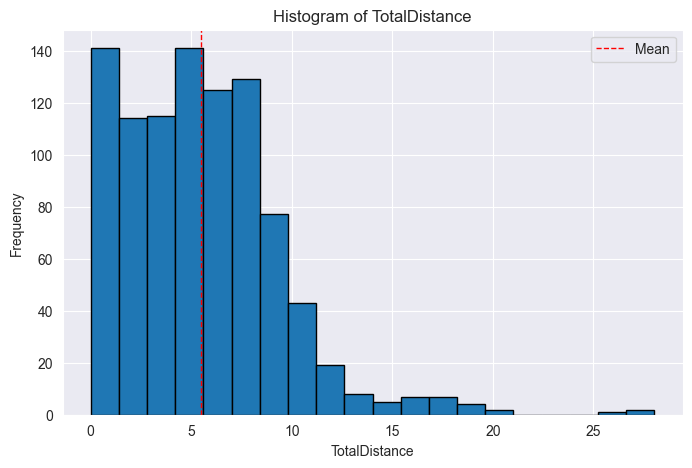

Descriptive Statistics for TotalDistance:
count    940.000000
mean       5.489702
std        3.924606
min        0.000000
25%        2.620000
50%        5.245000
75%        7.712500
max       28.030001
Name: TotalDistance, dtype: float64
Mode: [0.]
Number of outliers in TotalDistance: 23



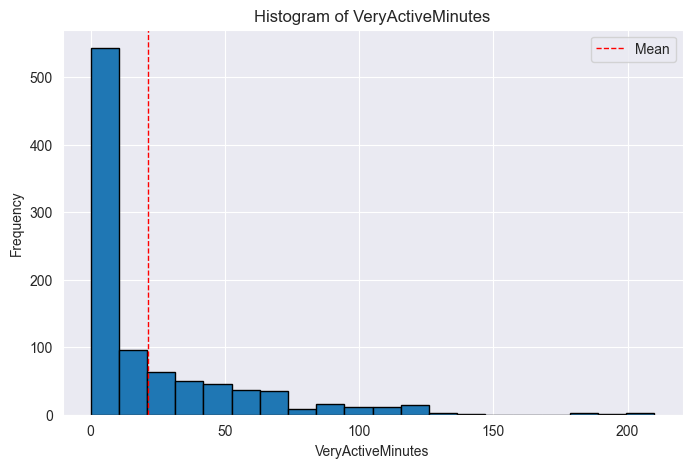

Descriptive Statistics for VeryActiveMinutes:
count    940.000000
mean      21.164894
std       32.844803
min        0.000000
25%        0.000000
50%        4.000000
75%       32.000000
max      210.000000
Name: VeryActiveMinutes, dtype: float64
Mode: [0]
Number of outliers in VeryActiveMinutes: 65



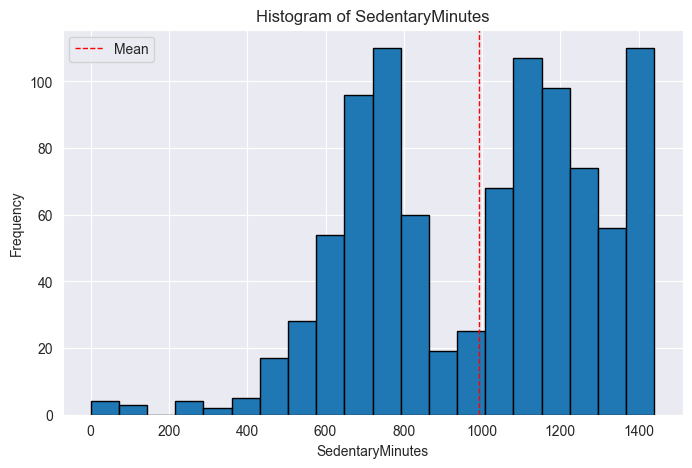

Descriptive Statistics for SedentaryMinutes:
count     940.000000
mean      991.210638
std       301.267437
min         0.000000
25%       729.750000
50%      1057.500000
75%      1229.500000
max      1440.000000
Name: SedentaryMinutes, dtype: float64
Mode: [1440]
Number of outliers in SedentaryMinutes: 0



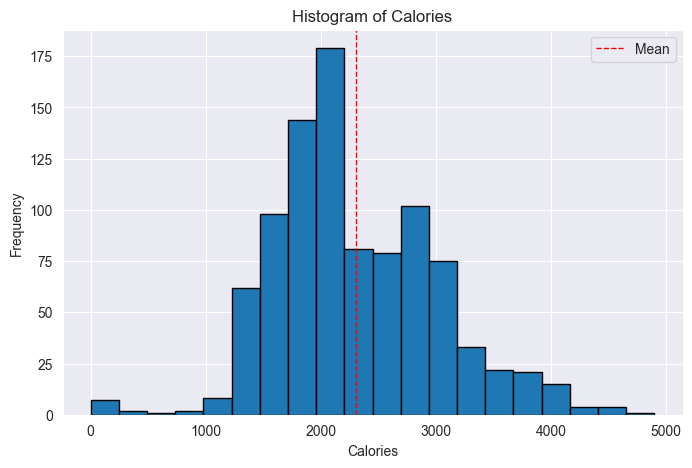

Descriptive Statistics for Calories:
count     940.000000
mean     2303.609574
std       718.166862
min         0.000000
25%      1828.500000
50%      2134.000000
75%      2793.250000
max      4900.000000
Name: Calories, dtype: float64
Mode: [1980]
Number of outliers in Calories: 16



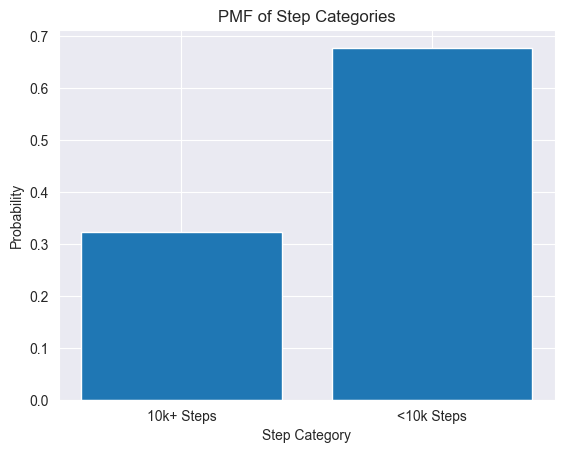

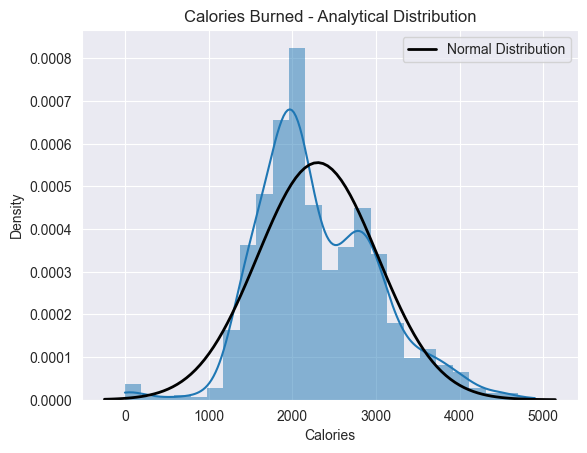

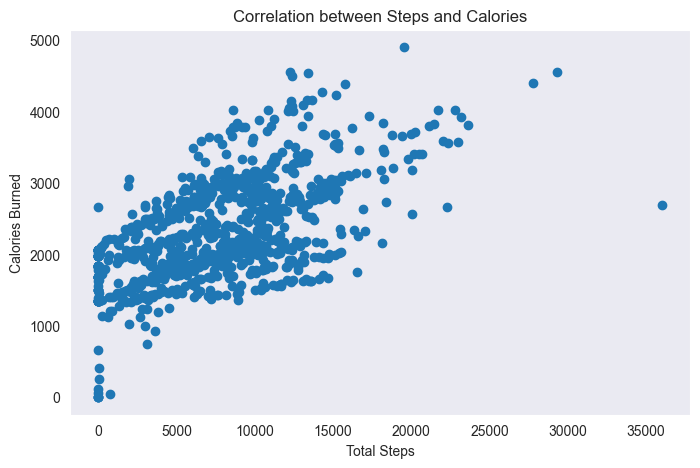

Pearson Correlation between Steps and Calories: 0.5915680862453356
T-statistic: 31.833304006141603, P-value: 4.1151334940087283e-153
                            OLS Regression Results                            
Dep. Variable:               Calories   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.437
Method:                 Least Squares   F-statistic:                     365.3
Date:                Thu, 20 Feb 2025   Prob (F-statistic):          5.08e-118
Time:                        19:43:22   Log-Likelihood:                -7244.5
No. Observations:                 940   AIC:                         1.449e+04
Df Residuals:                     937   BIC:                         1.451e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025    

In [35]:
import pandas as pd
import zipfile

# Path to the zip file
zip_path = '/Users/meganpokal/PycharmProjects/JupyterProject1/models/Fitbit.zip'

# File name inside the zip
file_name = 'mturkfitbit_export_4.12.16-5.12.16/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv'

# Access CSV file directly
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    with zip_ref.open(file_name) as file:
        daily_activity = pd.read_csv(file)

# Convert 'ActivityDate' to a datetime object
daily_activity['ActivityDate'] = pd.to_datetime(daily_activity['ActivityDate'], format='%m/%d/%Y')

# 5 Variables
variables = ['TotalSteps', 'TotalDistance', 'VeryActiveMinutes', 'SedentaryMinutes', 'Calories']
daily_data = daily_activity[variables]

# Exploratory Data Analysis
for var in variables:
    plt.figure(figsize=(8, 5))
    plt.hist(daily_data[var], bins=20, edgecolor='black')
    plt.title(f'Histogram of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')
    plt.axvline(daily_data[var].mean(), color='red', linestyle='dashed', linewidth=1, label='Mean')
    plt.legend()
    plt.show()

    # Descriptive statistics
    print(f'Descriptive Statistics for {var}:')
    print(daily_data[var].describe())
    print(f'Mode: {daily_data[var].mode().values}')

    # Outlier Detection using IQR
    q1 = daily_data[var].quantile(0.25)
    q3 = daily_data[var].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = daily_data[(daily_data[var] < lower_bound) | (daily_data[var] > upper_bound)]
    print(f"Number of outliers in {var}: {len(outliers)}\n")

# Dail_data copy
daily_data = daily_data.copy()

# PMF Example: Compare TotalSteps <10k vs. ≥10k
daily_data.loc[:, 'StepCategory'] = np.where(daily_data['TotalSteps'] >= 10000, '10k+ Steps', '<10k Steps')
pmf = Pmf.from_seq(daily_data['StepCategory'])
pmf.bar()
plt.title('PMF of Step Categories')
plt.xlabel('Step Category')
plt.ylabel('Probability')
plt.show()

# Analytical Distribution (Normal Distribution Fit)
sns.histplot(daily_data['Calories'], kde=True, stat="density", linewidth=0)
mu, std = stats.norm.fit(daily_data['Calories'])
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')
plt.title('Calories Burned - Analytical Distribution')
plt.xlabel('Calories')
plt.ylabel('Density')
plt.legend()
plt.show()

# Scatter Plots and Correlation Analysis
plt.figure(figsize=(8, 5))
plt.scatter(daily_data['TotalSteps'], daily_data['Calories'])
plt.xlabel('Total Steps')
plt.ylabel('Calories Burned')
plt.title('Correlation between Steps and Calories')
plt.grid()
plt.show()

# Correlation Analysis
correlation = daily_data['TotalSteps'].corr(daily_data['Calories'])
print(f'Pearson Correlation between Steps and Calories: {correlation}')

# Hypothesis Testing (Example: Steps vs. Calories)
t_stat, p_value = stats.ttest_ind(daily_data['TotalSteps'], daily_data['Calories'], equal_var=False)
print(f"T-statistic: {t_stat}, P-value: {p_value}")

# Regression Analysis (Calories ~ Steps + VeryActiveMinutes)
daily_data['VeryActiveMinutes'] = daily_data['VeryActiveMinutes'].fillna(0)
model = ols('Calories ~ TotalSteps + VeryActiveMinutes', data=daily_data).fit()
print(model.summary())



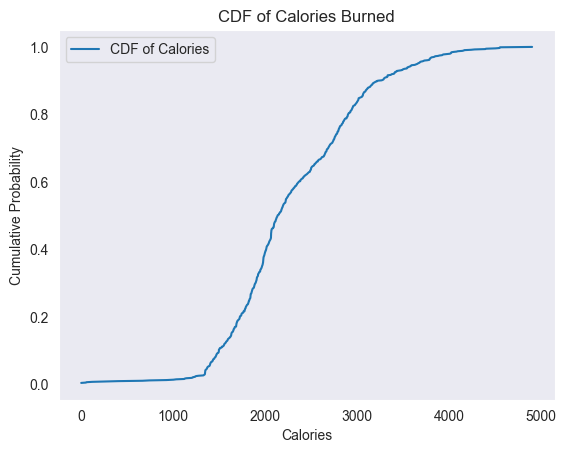

In [34]:
# CDF of Calories
from empiricaldist import Cdf

# Create CDF from the 'Calories' data
cdf = Cdf.from_seq(daily_data['Calories'])

# Plot the CDF using the plot method of the Cdf object
cdf.plot(label='CDF of Calories')

# Add labels and title to the plot
plt.xlabel('Calories')
plt.ylabel('Cumulative Probability')
plt.title('CDF of Calories Burned')
plt.grid()
plt.legend()
plt.show()
